# Objective: 
    Our objective is to cluster the countries based on various sales data provided to us across years. We have to apply an unsupervised learning technique like K means or Hierarchical clustering so as to get the final solution. But before that we have to bring the exports (in tons) of all countries down to same scale across years. Plus, as this solution needs to be repeatable we will have to do PCA so as to get the principal components which explain max variance.

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import os
os.chdir(r'C:\Users\je638474\Documents\JJ\Folders\Udemy\Python EDUREKA')

In [4]:
#Read CSV
dataset = pd.read_csv('Project_Data_1.csv')

In [5]:
#Check for null values
dataset.isnull().sum()

Sales of Wheat in tons    0
1990                      0
1991                      0
1992                      0
1993                      0
1994                      0
1995                      0
1996                      0
1997                      0
1998                      0
1999                      0
2000                      0
2001                      0
2002                      0
2003                      0
2004                      0
2005                      0
2006                      0
2007                      0
dtype: int64

In [6]:
#Header to be remaned
dataset = dataset.rename(columns={'Sales of Wheat in tons':'Country'})

In [7]:
dataset.head()

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
0,Afghanistan,436,429,422,415,407,397,397,387,374,373,346,326,304,308,283,267,251,238
1,Albania,42,40,41,42,42,43,42,44,43,42,40,34,32,32,29,29,26,22
2,Algeria,45,44,44,43,43,42,43,44,45,46,48,49,50,51,52,53,55,56
3,American Samoa,42,14,4,18,17,22,0,25,12,8,8,6,5,6,9,11,9,5
4,Andorra,39,37,35,33,32,30,28,23,24,22,20,20,21,18,19,18,17,19


In [8]:
#Confirming data type
dataset.dtypes


Country    object
1990       object
1991       object
1992       object
1993       object
1994       object
1995       object
1996        int64
1997        int64
1998        int64
1999        int64
2000        int64
2001        int64
2002        int64
2003        int64
2004       object
2005       object
2006       object
2007       object
dtype: object

In [9]:
#change all objects to integers
dataset.iloc[:,1:] = dataset.iloc[:,1:].replace(",","", regex=True).astype('int64')

In [10]:
#Re-check DType
dataset.dtypes

Country    object
1990        int64
1991        int64
1992        int64
1993        int64
1994        int64
1995        int64
1996        int64
1997        int64
1998        int64
1999        int64
2000        int64
2001        int64
2002        int64
2003        int64
2004        int64
2005        int64
2006        int64
2007        int64
dtype: object

In [12]:
#Identifying  x-value
x = dataset.iloc[:,1:].values
y = dataset.iloc[:,0].values

# 1.Split the data and 2. PCA

In [13]:
from sklearn.model_selection import train_test_split
x_train, y_train, x_test, y_test = train_test_split(x,y,test_size = 0.2)

In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components = None)
x_train_pca = pca.fit_transform(x_train)

In [15]:
pd.DataFrame(x_train_pca)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1076.278066,-659.879936,73.621794,-42.585640,-13.404270,8.679868,-5.897259,-10.253671,11.464891,-11.028236,-4.264865,26.240911,-1.524663,-30.822590,8.722318,-6.513175,-0.242846,-5.075148
1,712.747118,140.255965,-27.019915,1.792784,-12.742065,-11.989389,-1.678262,3.203423,0.227804,0.539944,-10.053776,2.180500,2.866167,0.859199,2.919472,-2.081518,-0.013730,0.506206
2,449.305083,15.224560,-1.972908,-6.925208,-21.520558,29.173607,-7.486016,20.912566,7.524646,8.086127,-6.594659,-3.022037,2.325309,-10.748259,4.137221,2.079292,7.097304,-2.911424
3,2196.057754,852.893495,-59.587922,-87.848391,-101.745970,1.534318,52.053095,182.149178,-40.026389,43.123534,13.925232,-42.779002,-34.086278,7.198963,-4.158361,15.119225,4.388474,-1.147743
4,-726.175995,0.259616,24.741509,2.696075,5.303407,-3.033582,-2.534819,6.460155,0.559307,-1.693902,-2.174742,-0.490902,2.598841,-0.037697,3.016240,3.900014,-1.269622,-0.197407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,1032.532787,362.952265,-123.541652,-30.490691,-5.156423,-99.531952,34.006016,-26.505254,-15.849197,-41.612450,-25.571164,-25.144204,17.228327,-2.188671,-2.362055,-23.665333,32.256488,-5.255118
161,-561.243148,32.416956,6.313181,2.398966,4.748000,5.420021,-1.573631,0.790227,2.409153,0.789778,-1.743100,0.352673,0.680747,3.261274,0.007393,-1.580999,-1.336703,0.415858
162,-167.794885,-121.482234,-102.387059,12.608306,-7.674536,-21.354796,6.750891,-19.441285,15.204369,33.716738,-17.735594,3.021750,-5.960648,-10.759095,-16.740608,-4.913194,-3.422123,3.624530
163,-408.667970,86.999676,19.497081,-6.209918,15.438690,-6.297659,6.306929,-1.553545,0.346066,-6.267555,-0.149844,-2.435506,0.450371,-3.613803,-2.519637,0.997529,-2.898590,0.919404


In [16]:
pca.explained_variance_ratio_

array([9.17084777e-01, 6.16703849e-02, 1.16493525e-02, 2.48950500e-03,
       1.90183141e-03, 1.42005228e-03, 1.10734620e-03, 7.75668855e-04,
       5.09852405e-04, 4.34554939e-04, 3.05043955e-04, 2.14570305e-04,
       1.74207258e-04, 1.05087823e-04, 5.42800079e-05, 5.02831471e-05,
       3.54881305e-05, 1.77140328e-05])

In [17]:
sum(pca.explained_variance_ratio_)

0.9999999999999999

In [18]:
#I am getting 80-90% of the data information from the 1st and 2nd slices from pca.explained_variance_ratio_.
#Hence, I will reduce the n_componenets to 2 and recheck the variance ratio

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
x_train_pca_2 = pca.fit_transform(x_train)

In [20]:
pd.DataFrame(x_train_pca_2)

,0,1
0,1076.278066,-659.879936
1,712.747118,140.255965
2,449.305083,15.224560
3,2196.057754,852.893495
4,-726.175995,0.259616
...,...,...
160,1032.532787,362.952265
161,-561.243148,32.416956
162,-167.794885,-121.482234
163,-408.667970,86.999676


In [21]:
pca.explained_variance_ratio_

array([0.91708478, 0.06167038])

In [ ]:
#Now I will run the model

# K-means

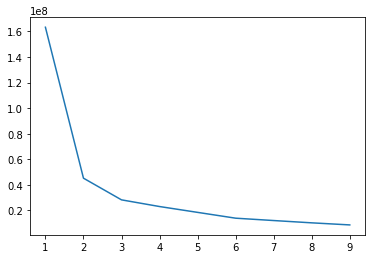

In [22]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i, init = 'k-means++')
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10),wcss)

In [23]:
kmeans = KMeans(n_clusters=3, init = 'k-means++')
y_kmeans = kmeans.fit_predict(x)

In [24]:
dataset = pd.concat([dataset,pd.DataFrame(y_kmeans)],axis=1)
dataset = dataset.rename(columns={0:'K-Mean Cluster Number'})

In [25]:
dataset.head()

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,K-Mean Cluster Number
0,Afghanistan,436,429,422,415,407,397,397,387,374,373,346,326,304,308,283,267,251,238,2
1,Albania,42,40,41,42,42,43,42,44,43,42,40,34,32,32,29,29,26,22,0
2,Algeria,45,44,44,43,43,42,43,44,45,46,48,49,50,51,52,53,55,56,0
3,American Samoa,42,14,4,18,17,22,0,25,12,8,8,6,5,6,9,11,9,5,0
4,Andorra,39,37,35,33,32,30,28,23,24,22,20,20,21,18,19,18,17,19,0


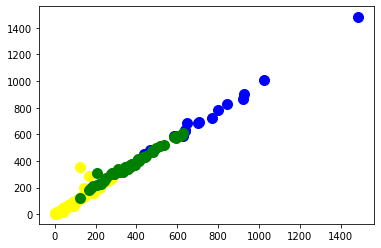

In [26]:
plt.scatter(x[y_kmeans==0,0], x[y_kmeans==0,1], s=100, c='yellow', label='Cluster1')
plt.scatter(x[y_kmeans==1,0], x[y_kmeans==1,1], s=100, c='blue', label='Cluster2')
plt.scatter(x[y_kmeans==2,0], x[y_kmeans==2,1], s=100, c='green', label='Cluster3')

# Hierarchical Clusetering

Text(0, 0.5, 'Euclidean Distance')

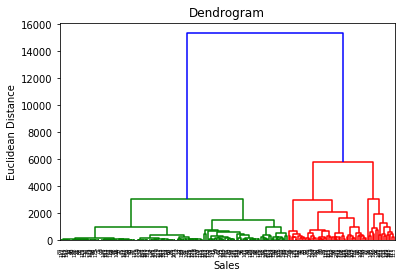

In [27]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(x, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Sales')
plt.ylabel('Euclidean Distance')

In [28]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(x)

In [29]:
dataset = pd.concat([dataset,pd.DataFrame(y_hc)],axis=1)
dataset = dataset.rename(columns={0:'Hierarchical Cluster Number'})

In [30]:
dataset.head()

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2000,2001,2002,2003,2004,2005,2006,2007,K-Mean Cluster Number,Hierarchical Cluster Number
0,Afghanistan,436,429,422,415,407,397,397,387,374,...,346,326,304,308,283,267,251,238,2,0
1,Albania,42,40,41,42,42,43,42,44,43,...,40,34,32,32,29,29,26,22,0,1
2,Algeria,45,44,44,43,43,42,43,44,45,...,48,49,50,51,52,53,55,56,0,1
3,American Samoa,42,14,4,18,17,22,0,25,12,...,8,6,5,6,9,11,9,5,0,1
4,Andorra,39,37,35,33,32,30,28,23,24,...,20,20,21,18,19,18,17,19,0,1


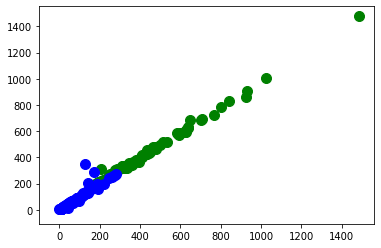

In [31]:
plt.scatter(x[y_hc==0,0], x[y_hc==0,1], s=100, c='green', label='Cluster1')
plt.scatter(x[y_hc==1,0], x[y_hc==1,1], s=100, c='blue', label='Cluster2')

# End of case study